In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df_tweet = pd.read_csv('Tweets.csv')

<AxesSubplot:>

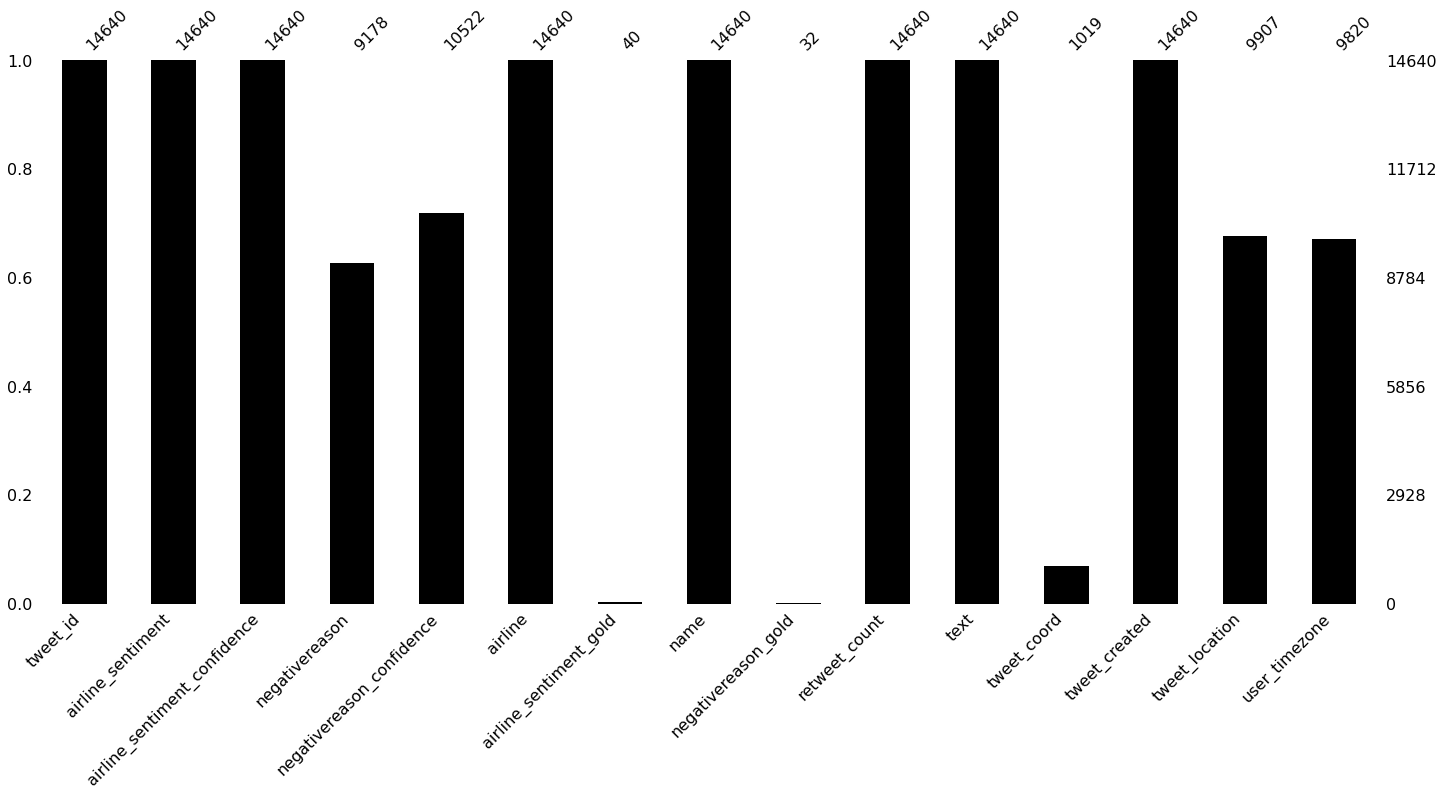

In [16]:
mns.bar(df_tweet,color='black')

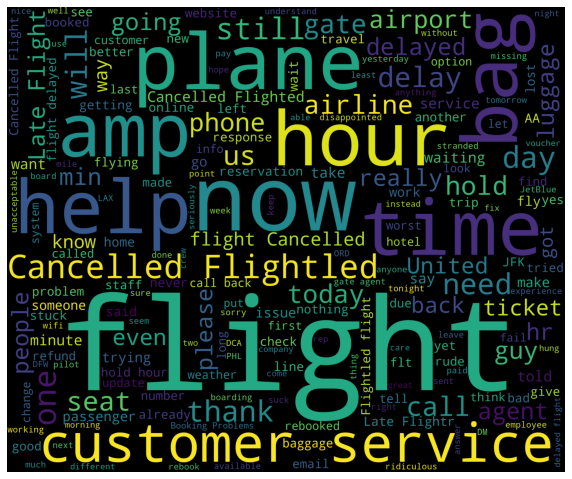

In [17]:
new_data=df_tweet[df_tweet['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

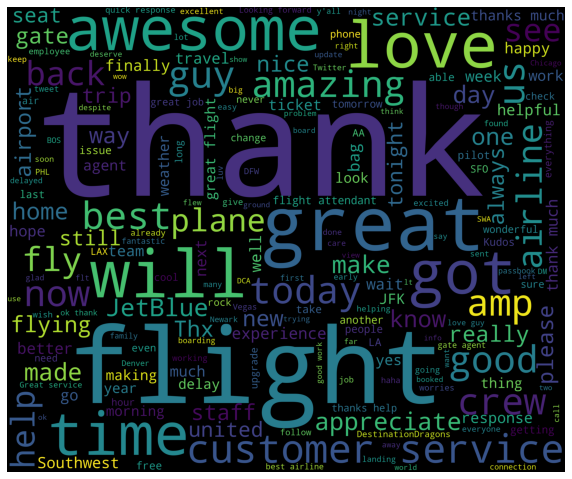

In [18]:
new_data=df_tweet[df_tweet['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

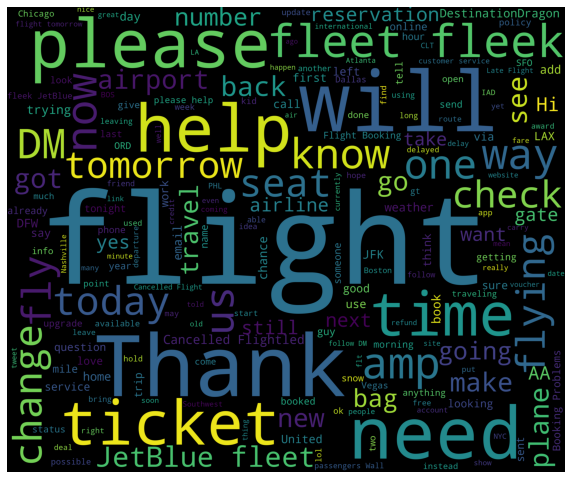

In [19]:
new_data=df_tweet[df_tweet['airline_sentiment']=='neutral']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
#cleaning text
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re, ' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        return ' '.join(tokens)
    
df_tweet.text = df_tweet.text.apply(lambda x:preprocess(x))

In [21]:
#since the neutral and positive have the same words we merge together
df_tweet['sentiment']= df_tweet['airline_sentiment'].apply(lambda x: 'Negative' if x =='negative' else 'Positive')

In [22]:
X=df_tweet.text
y = df_tweet.sentiment

In [27]:
from sklearn.pipeline import Pipeline
text_clf1 = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
text_clf2 = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',BernoulliNB())])
text_clf3 = Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MLPClassifier(max_iter=20))])

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [28]:
text_clf1.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [29]:
pred1 = text_clf1.predict(X_test)
pred1

array(['Positive', 'Negative', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype='<U8')

              precision    recall  f1-score   support

    Negative       0.72      0.99      0.84      2741
    Positive       0.94      0.38      0.54      1651

    accuracy                           0.76      4392
   macro avg       0.83      0.68      0.69      4392
weighted avg       0.81      0.76      0.72      4392



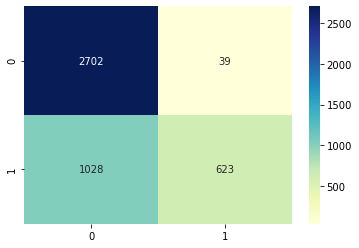

In [30]:
sns.heatmap(confusion_matrix(y_test, pred1),cmap="YlGnBu",annot=True, fmt='.5g')
print(classification_report(y_test, pred1))